### Convolutional Layer

In [1]:
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

IS_COLAB = "google.colab" in sys.modules

import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

if not tf.config.list_physical_devices('GPU'):
    print("No GPU detected. CNN would be very slow")
    if IS_COLAB:
        print("Change RUNTIME to GPU")

import numpy as np
import os

np.random.seed(42)
tf.random.set_seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

2022-11-25 17:15:35.424662: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


No GPU detected. CNN would be very slow


In [2]:
from sklearn.datasets import load_sample_image
import matplotlib.pyplot as plt

# 샘플 이미지를 로드합니다.
china = load_sample_image("china.jpg") / 255
flower = load_sample_image("flower.jpg") / 255
images = np.array([china, flower])
batch_size, height, width, channels = images.shape
print('shape of image:', images.shape)
print('- batch_size:', batch_size)
print('- image size:', width, 'x', height)
print('- channels:', channels)

shape of image: (2, 427, 640, 3)
- batch_size: 2
- image size: 640 x 427
- channels: 3


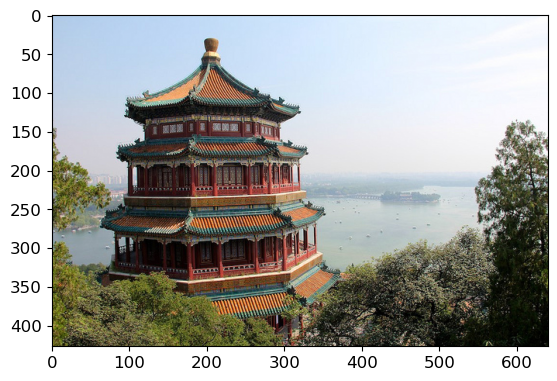

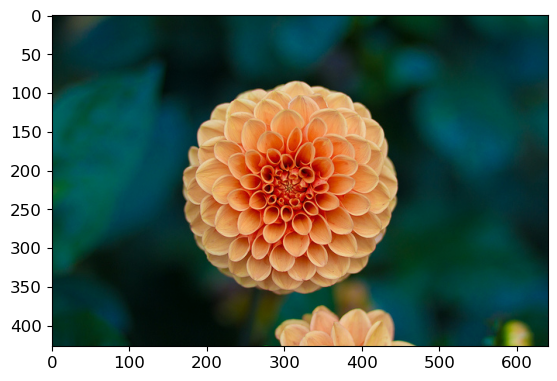

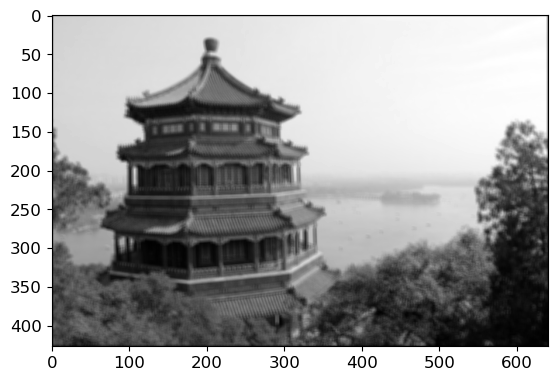

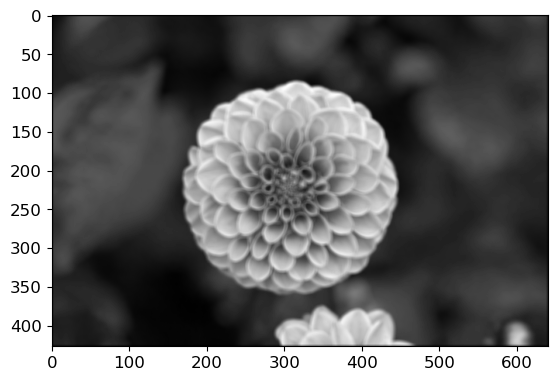

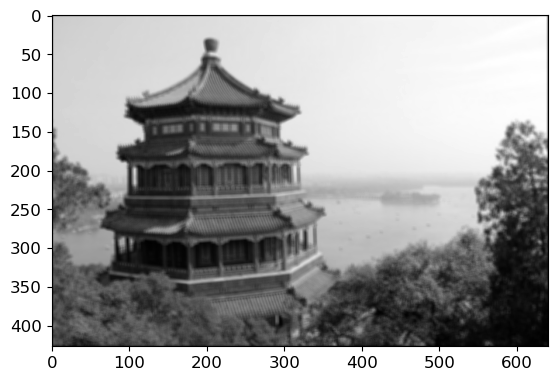

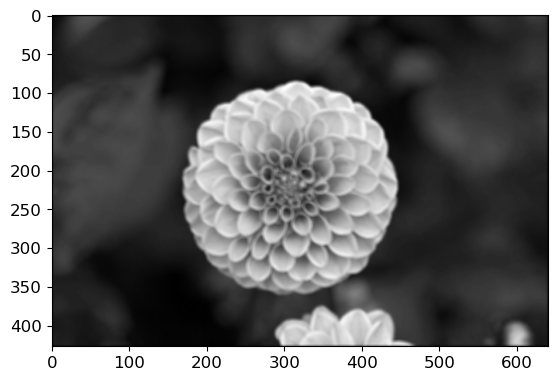

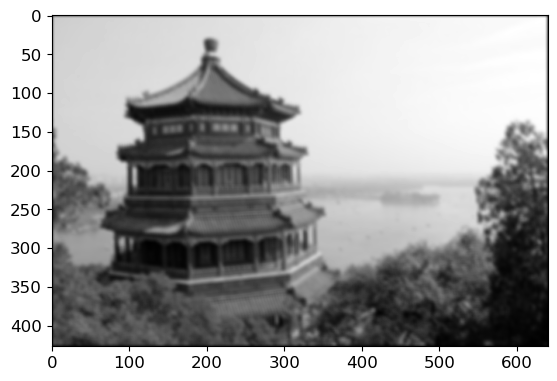

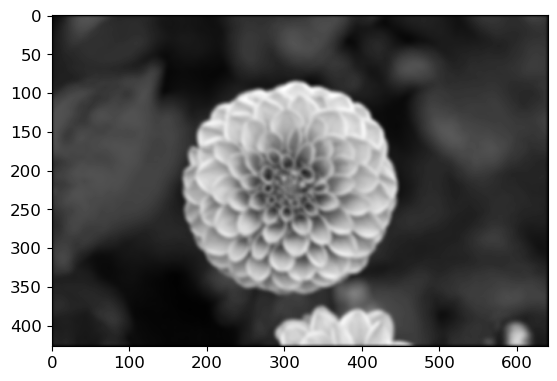

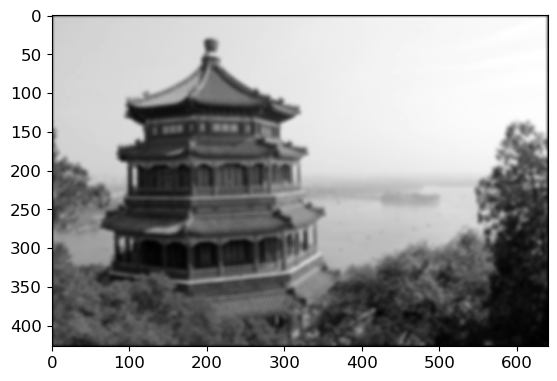

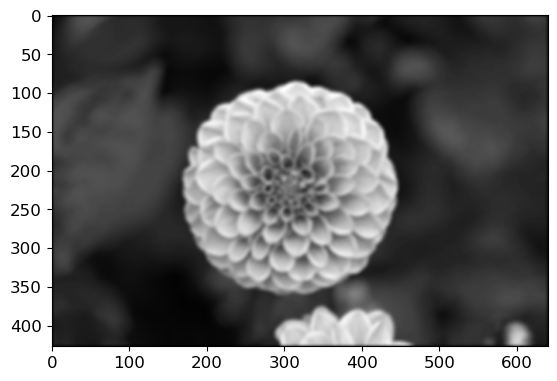

In [27]:
plt.imshow(china)
plt.show()
plt.imshow(flower)
plt.show()

# 1차 컨볼루션 6개의 필터 생성
filter10 = np.zeros(shape=(5, 5, channels, 2), dtype=np.float32)
filter11 = np.zeros(shape=(5, 5, channels, 2), dtype=np.float32)

for c in range(2):
    for i in range(5):
        for j in range(5):
            globals()[f'filter1{c}'][i, j, 0, 0] = np.random.randint(10)
            globals()[f'filter1{c}'][i, j, 0, 1] = np.random.randint(10)
            globals()[f'filter1{c}'][i, j, 1, 0] = np.random.randint(10)
            globals()[f'filter1{c}'][i, j, 1, 1] = np.random.randint(10)
            globals()[f'filter1{c}'][i, j, 2, 0] = np.random.randint(10)
            globals()[f'filter1{c}'][i, j, 2, 1] = np.random.randint(10)
        
    outputs = tf.nn.conv2d(images, globals()[f'filter1{c}'], strides=1, padding="SAME")
    plt.imshow(outputs[0, :, :, 1], cmap="gray")
    plt.show()
    plt.imshow(outputs[1, :, :, 1], cmap="gray")
    plt.show()


# 2차 컨볼루션 2개의 필터 생성
channels2 = outputs.shape[3]
filter20 = np.zeros(shape=(5, 5, channels2, 2), dtype=np.float32)
filter21 = np.zeros(shape=(5, 5, channels2, 2), dtype=np.float32)

for c in range(2):
    for i in range(5):
        for j in range(5):
            globals()[f'filter2{c}'][i, j, 0, 0] = np.random.randint(10)
            globals()[f'filter2{c}'][i, j, 0, 1] = np.random.randint(10)
            globals()[f'filter2{c}'][i, j, 1, 0] = np.random.randint(10)
            globals()[f'filter2{c}'][i, j, 1, 1] = np.random.randint(10)
        
    outputs2 = tf.nn.conv2d(outputs, globals()[f'filter2{c}'], strides=1, padding="SAME")
    plt.imshow(outputs2[0, :, :, 1], cmap="gray")
    plt.show()
    plt.imshow(outputs2[1, :, :, 1], cmap="gray")
    plt.show()

In [13]:
filter20.shape

NameError: name 'filter20' is not defined

In [20]:
outputs

2

In [24]:
outputs2

<tf.Tensor: shape=(2, 427, 640, 2), dtype=float64, numpy=
array([[[[14012.62745098, 12952.44313725],
         [17732.23529412, 19694.        ],
         [22649.34509804, 26912.16470588],
         ...,
         [28079.46666667, 36133.68627451],
         [21033.96862745, 30082.65490196],
         [13532.19607843, 22128.74117647]],

        [[19654.0745098 , 18971.96078431],
         [25552.67843137, 27801.76470588],
         [32705.26666667, 37601.82352941],
         ...,
         [40656.18431373, 49954.11764706],
         [30829.73333333, 40834.35294118],
         [20224.14117647, 29760.23921569]],

        [[26202.70588235, 23864.80784314],
         [34481.90196078, 34295.35686275],
         [44115.81568627, 45939.50588235],
         ...,
         [54836.1372549 , 60407.11764706],
         [41323.00784314, 49101.34117647],
         [27765.06666667, 35131.97647059]],

        ...,

        [[11383.01568627, 10183.71764706],
         [14975.8       , 13999.81176471],
         [18757.6705